In [ ]:
import polars as pl
import duckdb as dd

export_folder = "test_telemetry_exports"
duckdb_conn = dd.connect("test_telemetry.duckdb")
tables = duckdb_conn.sql("SHOW TABLES") #note: I dumped a csv with all tables already

In [ ]:
#Some basic data from the telemetry for testing
Throttle_Pos = duckdb_conn.sql('SELECT * FROM "Throttle Pos"')
Brake_Pos = duckdb_conn.sql('SELECT * FROM "Brake Pos"')
Steering_Pos = duckdb_conn.sql('SELECT * FROM "Steering Pos"')
Gear = duckdb_conn.sql('SELECT * FROM "Gear"')
Speed = duckdb_conn.sql('SELECT * FROM "GPS Speed"')
Time = duckdb_conn.sql('SELECT * FROM "GPS Time"')


In [ ]:
# Exporting data to CSV files
tables.to_csv(f"{export_folder}/available_tables.csv", header=True)
Throttle_Pos.to_csv(f"{export_folder}/throttle_position.csv", header=True)
Brake_Pos.to_csv(f"{export_folder}/brake_position.csv", header=True)
Steering_Pos.to_csv(f"{export_folder}/steering_position.csv", header=True)
Gear.to_csv(f"{export_folder}/gear.csv", header=True)
Speed.to_csv(f"{export_folder}/speed.csv", header=True)
Time.to_csv(f"{export_folder}/time.csv", header=True)

In [ ]:
# we have to convert the data to a dataframe of either pandas or polars to use it in matplotlib
throttle_pl = pl.from_pandas(Throttle_Pos.df())
throttle_pl

value
f32
0.0
0.0
0.0
0.0
0.0
…
0.0
0.0
0.0


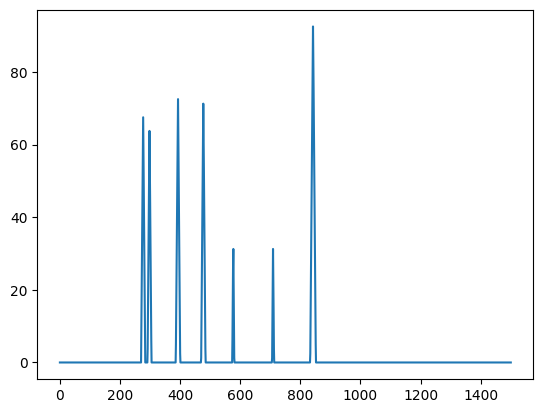

In [5]:
import matplotlib.pyplot as plt

plt.plot(throttle_pl, label='Throttle Position')
